In [226]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

import ipywidgets as widgets
from ipywidgets import interact
import nbinteract as nbi

pd.options.display.max_rows = 10
pd.options.display.max_columns = 8

# Lecture 10: Working with Text

## Part 1: Cleaning Text

5-10 min

In [40]:
# Issues:
# Capitalization
# Spaces
# Punctuation
# Extra characters

counties1 = [
    'De Witt County',
    'Lac qui Parle County',
    'Lewis and Clark County',
    'St John the Baptist Parish',
]

counties2 = [
    'DeWitt  ',
    'Lac Qui Parle',
    'Lewis & Clark ',
    'St. John the Baptist',
]

Python string methods are useful: https://docs.python.org/3/library/stdtypes.html#string-methods

In particular, string replacements, deletions, and transformations are easy to do.

In [41]:
county = counties1[0]
county

'De Witt County'

In [187]:
county[:-7].lower().replace(' ', '')

'dewitt'

In [188]:
[county[:-7].lower().replace(' ', '') for county in counties1]

['dewitt', 'lacquiparle', 'lewisandclark', 'stjohnthebaptist']

In [44]:
county2 = counties2[0]
county2

'DeWitt  '

In [189]:
(county2
 .lower()
 .strip()
 .replace('&', 'and')
 .replace(' ', '')
 .replace('.', '')
)

'dewitt'

In [190]:
[county2
 .lower()
 .strip()
 .replace('&', 'and')
 .replace(' ', '')
 .replace('.', '')
 for county2 in counties2]

['dewitt', 'lacquiparle', 'lewisandclark', 'stjohnthebaptist']

In [191]:
def clean_county(county):
    return (county
            .lower()
            .strip()
            .replace(' county', '')
            .replace(' parish', '')
            .replace('&', 'and')
            .replace(' ', '')
            .replace('.', ''))
[clean_county(county) for county in counties1], [clean_county(county) for county in counties2]

(['dewitt', 'lacquiparle', 'lewisandclark', 'stjohnthebaptist'],
 ['dewitt', 'lacquiparle', 'lewisandclark', 'stjohnthebaptist'])

## Part 2: Extracting Fields

10-15 min

In [193]:
!head data/smallLog.txt

169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"
193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"
169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"


In [152]:
# Small files can be read in completely
with open('data/smallLog.txt') as f:
    log = f.readlines()
log

['169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n',
 '193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"\n',
 '169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"\n']

**How can I extract the date and time?**

As before, we'll start with a single line.

In [153]:
line = log[0]
line

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

In [154]:
line.split(' [')

['169.237.46.168 - -',
 '26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n']

In [155]:
(line
 .split(' [')[1]
 .split('] ')[0]
)

'26/Jan/2014:10:47:58 -0800'

Works, but what if I want the individual components? E.g.

    ['26', 'Jan', '2014', '10', '47', '58', '-0800']


In [166]:
# Wow, what a pain...
day, month, rest = (line
 .split(' [')[1]
 .split('] ')[0]
 .split('/')
)

year, hour, minute, rest = rest.split(':')
sec, timezone = rest.split(' ')

day, month, year, hour, minute, sec, timezone

('26', 'Jan', '2014', '10', '47', '58', '-0800')

Wouldn't it be great to tell Python to just match this general pattern?

    [(day)/(month)/(year):(hour):(min):(sec) (timezone)]

### Regular Expressions

15-40 mins

Regular expressions let you specify a pattern for a string. Follow attentively!

In [208]:
import re

re.findall('\[26/Jan/2014:10:47:58 -0800\]', line)

['[26/Jan/2014:10:47:58 -0800]']

In [209]:
re.findall('\[(26)/(Jan)/(2014):(10):(47):(58) (-0800)\]', line)

[('26', 'Jan', '2014', '10', '47', '58', '-0800')]

The `.` character is a wildcard (anything goes except newlines):

In [174]:
re.findall('\[(..)/(...)/(....):(..):(..):(..) (.....)\]', line)

[('26', 'Jan', '2014', '10', '47', '58', '-0800')]

In [175]:
# Hmmm
[re.findall('\[(..)/(...)/(....):(..):(..):(..) (.....)\]', line)
 for line in log]

[[('26', 'Jan', '2014', '10', '47', '58', '-0800')], [], []]

In [176]:
# Only one digit for month!
log[1]

'193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"\n'

In [179]:
# Ok!
[re.findall('\[(.+)/(.+)/(.+):(.+):(.+):(.+) (.+)\]', line)
 for line in log]

[[('26', 'Jan', '2014', '10', '47', '58', '-0800')],
 [('2', 'Feb', '2005', '17', '23', '6', '-0800')],
 [('3', 'Feb', '2006', '10', '18', '37', '-0800')]]

**Discussion question:** What happens if we remove the brackets?

In [210]:
re.findall('(.+)/(.+)/(.+):(.+):(.+):(.+) (.+)', line)

[('169.237.46.168 - - [26',
  'Jan',
  '2014',
  '10',
  '47',
  '58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585',
  '"http://anson.ucdavis.edu/courses/"')]

Make the regex more precise:

In [184]:
[re.findall(
    '\[(\d+)/([a-zA-z]+)/(\d+):(\d+):(\d+):(\d+) (.\d+)\]',
    line
) for line in log]

[[('26', 'Jan', '2014', '10', '47', '58', '-0800')],
 [('2', 'Feb', '2005', '17', '23', '6', '-0800')],
 [('3', 'Feb', '2006', '10', '18', '37', '-0800')]]

## Survey Question:

40-55 min

https://regexone.com/problem/extracting_url_data

In [198]:
html = '<div class="js-tweet-text-container"><p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" lang="en" data-aria-label-part="0">Today, I was honored to be joined by Republicans and Democrats from both the House and Senate, as well as members of my Cabinet - to discuss the urgent need to rebuild and restore America’s depleted infrastructure. <a href="https://t.co/8ByoQJsjTT" rel="nofollow noopener" dir="ltr" data-expanded-url="http://45.wh.gov/UDL9yE" class="twitter-timeline-link" target="_blank" title="http://45.wh.gov/UDL9yE"><span class="tco-ellipsis"></span><span class="invisible">http://</span><span class="js-display-url">45.wh.gov/UDL9yE</span><span class="invisible"></span><span class="tco-ellipsis"><span class="invisible">&nbsp;</span></span></a><a href="https://t.co/BVBRDvHfcC" class="twitter-timeline-link u-hidden" data-pre-embedded="true" dir="ltr">pic.twitter.com/BVBRDvHfcC</a></p></div>'

html_re = '<[^>]+>'

re.sub(html_re, '', html)

'Today, I was honored to be joined by Republicans and Democrats from both the House and Senate, as well as members of my Cabinet - to discuss the urgent need to rebuild and restore America’s depleted infrastructure. http://45.wh.gov/UDL9yE&nbsp;pic.twitter.com/BVBRDvHfcC'

In [207]:
urls = [
    'ftp://file_server.com:21/top_secret/life_changing_plans.pdf',
    'https://regexone.com/lesson/introduction#section',
    'file://localhost:4040/zip_file',
    'https://s3cur3-server.com:9999/',
    'market://search/angry%20birds',
]

url_re = '(\w+)://([\w\-.]+):?(\d+)?/'

[re.findall(url_re, url) for url in urls]

[<_sre.SRE_Match object; span=(0, 25), match='ftp://file_server.com:21/'>,
 <_sre.SRE_Match object; span=(0, 21), match='https://regexone.com/'>,
 <_sre.SRE_Match object; span=(0, 22), match='file://localhost:4040/'>,
 <_sre.SRE_Match object; span=(0, 31), match='https://s3cur3-server.com:9999/'>,
 <_sre.SRE_Match object; span=(0, 16), match='market://search/'>]

## Part 3: Creating Features

55-85 min

In [267]:
vio = pd.read_csv('data/violations.csv', header=0, names=['id', 'date', 'desc'])
desc = vio['desc']
vio.head()

id      date                                               desc
0  19  20171211  Inadequate food safety knowledge or lack of ce...
1  19  20171211   Unapproved or unmaintained equipment or utensils
2  19  20160513  Unapproved or unmaintained equipment or utensi...
3  19  20160513  Unclean or degraded floors walls or ceilings  ...
4  19  20160513  Food safety certificate or food handler card n...

In [ ]:
counts = desc.value_counts()

counts[:10]

In [ ]:
# Hmmm...
counts[50:60]

In [270]:
pd.Series([re.sub('\s*\[.*\]$', '', violation) for violation in desc])

0        Inadequate food safety knowledge or lack of ce...
1         Unapproved or unmaintained equipment or utensils
2         Unapproved or unmaintained equipment or utensils
3             Unclean or degraded floors walls or ceilings
4        Food safety certificate or food handler card n...
                               ...                        
39037              Insufficient hot water or running water
39038                     Unclean nonfood contact surfaces
39039                         High risk vermin infestation
39040               Moderate risk food holding temperature
39041    Wiping cloths not clean or properly stored or ...
Length: 39042, dtype: object

pandas has built-in string functions that operate like a loop:

In [271]:
desc.str

In [277]:
# Equivalent to
# pd.Series([len(violation) for violation in desc])
desc.str.len()

0         73
1         48
2         90
3         86
4        100
        ... 
39037     39
39038     74
39039     70
39040     81
39041    108
Name: desc, Length: 39042, dtype: int64

In [278]:
# Equivalent to
# pd.Series([violation[0] for violation in desc])
desc.str[0]

0        I
1        U
2        U
3        U
4        F
        ..
39037    I
39038    U
39039    H
39040    M
39041    W
Name: desc, Length: 39042, dtype: object

In [279]:
# Equivalent to
# pd.Series([re.sub('\s*\[.*\]$', '', violation) for violation in desc])
desc.str.replace('\s*\[.*\]$', '')

0        Inadequate food safety knowledge or lack of ce...
1         Unapproved or unmaintained equipment or utensils
2         Unapproved or unmaintained equipment or utensils
3             Unclean or degraded floors walls or ceilings
4        Food safety certificate or food handler card n...
                               ...                        
39037              Insufficient hot water or running water
39038                     Unclean nonfood contact surfaces
39039                         High risk vermin infestation
39040               Moderate risk food holding temperature
39041    Wiping cloths not clean or properly stored or ...
Name: desc, Length: 39042, dtype: object

In [275]:
only_desc = (desc
             .str.replace('\s*\[.*\]$', '')
             .str.strip()
             .str.lower())
only_desc

0        inadequate food safety knowledge or lack of ce...
1         unapproved or unmaintained equipment or utensils
2         unapproved or unmaintained equipment or utensils
3             unclean or degraded floors walls or ceilings
4        food safety certificate or food handler card n...
                               ...                        
39037              insufficient hot water or running water
39038                     unclean nonfood contact surfaces
39039                         high risk vermin infestation
39040               moderate risk food holding temperature
39041    wiping cloths not clean or properly stored or ...
Name: desc, Length: 39042, dtype: object

In [ ]:
for v in only_desc.value_counts().head(20).index:
    print(v)

Let's define some features.

In [286]:
vio['desc'] = only_desc
vio.head()

id      date                                               desc
0  19  20171211  inadequate food safety knowledge or lack of ce...
1  19  20171211   unapproved or unmaintained equipment or utensils
2  19  20160513   unapproved or unmaintained equipment or utensils
3  19  20160513       unclean or degraded floors walls or ceilings
4  19  20160513  food safety certificate or food handler card n...

In [293]:
with_features = (vio
 .assign(is_clean     = only_desc.str.contains('clean|sanit'))
 .assign(is_high_risk = only_desc.str.contains('high risk'))
 .assign(is_vermin    = only_desc.str.contains('vermin'))
 .assign(is_surface   = only_desc.str.contains('wall|ceiling|floor|surface'))
 .assign(is_human     = only_desc.str.contains('hand|glove|hair|nail'))
 .assign(is_permit    = only_desc.str.contains('permit|certif'))
)
with_features.head()

id      date                                               desc  is_clean  \
0  19  20171211  inadequate food safety knowledge or lack of ce...     False   
1  19  20171211   unapproved or unmaintained equipment or utensils     False   
2  19  20160513   unapproved or unmaintained equipment or utensils     False   
3  19  20160513       unclean or degraded floors walls or ceilings      True   
4  19  20160513  food safety certificate or food handler card n...     False   

     ...      is_vermin  is_surface  is_human  is_permit  
0    ...          False       False     False       True  
1    ...          False       False     False      False  
2    ...          False       False     False      False  
3    ...          False        True     False      False  
4    ...          False       False      True       True  

[5 rows x 9 columns]

Now let's see how which violations are most detrimental to the inspection scores:

In [317]:
ins = pd.read_csv('data/inspections.csv',
                  header=0,
                  usecols=[0, 1, 2],
                  names=['id', 'score', 'date'])
ins.head()

id  score      date
0  19     94  20160513
1  19     94  20171211
2  24     98  20171101
3  24     98  20161005
4  24     96  20160311

In [321]:
count_features = (with_features
 .groupby(['id', 'date'])
 .sum()
 .reset_index()
)
count_features.head()

id      date  is_clean  is_high_risk  is_vermin  is_surface  is_human  \
0  19  20160513       1.0           0.0        0.0         1.0       1.0   
1  19  20171211       0.0           0.0        0.0         0.0       0.0   
2  24  20160311       2.0           0.0        0.0         2.0       0.0   
3  24  20161005       1.0           0.0        0.0         1.0       0.0   
4  24  20171101       0.0           0.0        0.0         0.0       0.0   

   is_permit  
0        1.0  
1        1.0  
2        0.0  
3        0.0  
4        0.0

In [322]:
ins = pd.read_csv('data/inspections.csv',
                  header=0,
                  usecols=[0, 1, 2],
                  names=['id', 'score', 'date'])
ins.head()

id  score      date
0  19     94  20160513
1  19     94  20171211
2  24     98  20171101
3  24     98  20161005
4  24     96  20160311

In [330]:
with_scores = (
    pd.melt(count_features, id_vars=['id', 'date'],
            var_name='feature', value_name='num_vios')
    .merge(ins, left_on=['id', 'date'], right_on=['id', 'date'])
)
with_scores.head()

id      date       feature  num_vios  score
0  19  20160513      is_clean       1.0     94
1  19  20160513  is_high_risk       0.0     94
2  19  20160513     is_vermin       0.0     94
3  19  20160513    is_surface       1.0     94
4  19  20160513      is_human       1.0     94

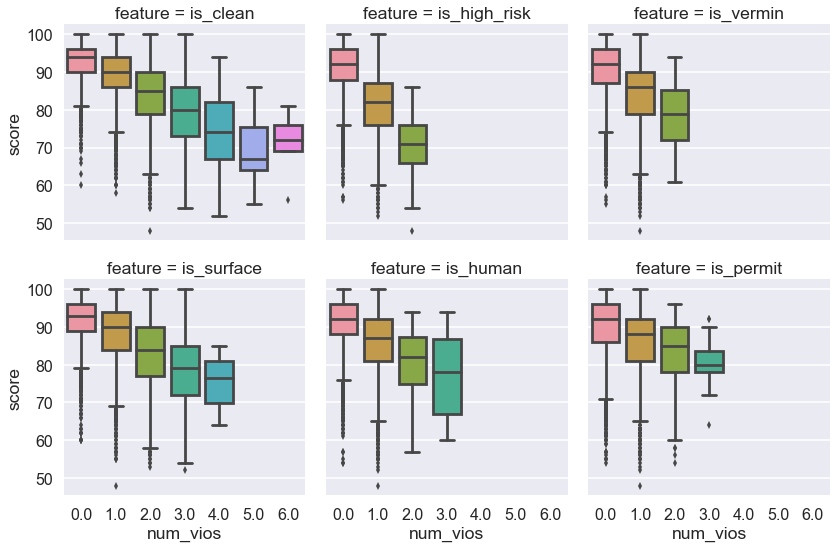

In [340]:
sns.factorplot(x='num_vios', y='score',
               col='feature', col_wrap=3,
               kind='box',
               data=with_scores)